In [358]:
import tensorflow as tf
import numpy as np
import warnings
import sklearn
from sklearn.preprocessing import LabelEncoder
import pandas as pd
warnings.filterwarnings('ignore')

In [359]:
tf.__version__

'2.15.0'

In [360]:
data = pd.read_csv("D:\\Data Science\\Assignment\\Assignment 16\\forestfires.csv")
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [361]:
data.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


In [362]:
data1 = pd.get_dummies(data,columns=['month','day'])
data1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,False,False,False,True,False,False,False,False,False,False
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,False,True,False,False,False,False,False,False,True,False
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,False,True,False,False,False,True,False,False,False,False
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,False,False,False,True,False,False,False,False,False,False
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,False,False,False,False,False,False,True,False,False,False
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,False,False,False,False,False,False,True,False,False,False
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,False,False,False,False,False,False,True,False,False,False
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,False,False,False,False,False,True,False,False,False,False


In [363]:
le = LabelEncoder()
data['size_category'] = le.fit_transform(data['size_category'])
data.head()


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


In [364]:
data = data.drop(columns=['month','day'])
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [365]:
x = data.iloc[:,:28]
y = data.iloc[:,28:29]

In [366]:
seed = 7
np.random.seed(seed)

In [367]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12,input_dim=28,activation='sigmoid'))
model.add(tf.keras.layers.Dense(8,activation='sigmoid'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [368]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 12)                348       
                                                                 
 dense_35 (Dense)            (None, 8)                 104       
                                                                 
 dense_36 (Dense)            (None, 1)                 9         
                                                                 
Total params: 461 (1.80 KB)
Trainable params: 461 (1.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [369]:
model.compile(loss ='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [370]:
history=model.fit(x, y, validation_split=0.20, epochs=50, batch_size=100)

Epoch 1/50


5/5 [==============================] - 1s 64ms/step - loss: 0.7364 - accuracy: 0.2615 - val_loss: 0.7189 - val_accuracy: 0.2788
Epoch 2/50
5/5 [==============================] - 0s 12ms/step - loss: 0.7221 - accuracy: 0.2615 - val_loss: 0.7074 - val_accuracy: 0.2788
Epoch 3/50
5/5 [==============================] - 0s 12ms/step - loss: 0.7087 - accuracy: 0.2736 - val_loss: 0.6980 - val_accuracy: 0.6346
Epoch 4/50
5/5 [==============================] - 0s 11ms/step - loss: 0.6978 - accuracy: 0.6465 - val_loss: 0.6900 - val_accuracy: 0.6346
Epoch 5/50
5/5 [==============================] - 0s 11ms/step - loss: 0.6884 - accuracy: 0.6392 - val_loss: 0.6818 - val_accuracy: 0.6442
Epoch 6/50
5/5 [==============================] - 0s 11ms/step - loss: 0.6789 - accuracy: 0.6368 - val_loss: 0.6756 - val_accuracy: 0.6538
Epoch 7/50
5/5 [==============================] - 0s 11ms/step - loss: 0.6716 - accuracy: 0.6368 - val_loss: 0.6701 - val_accuracy: 0.6538
Epoch 8/50
5/5 [======================

In [371]:
scores = model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.5861 - accuracy: 0.7311
accuracy: 73.11%


In [372]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [373]:
model.history.history.keys()
import matplotlib.pyplot as plt

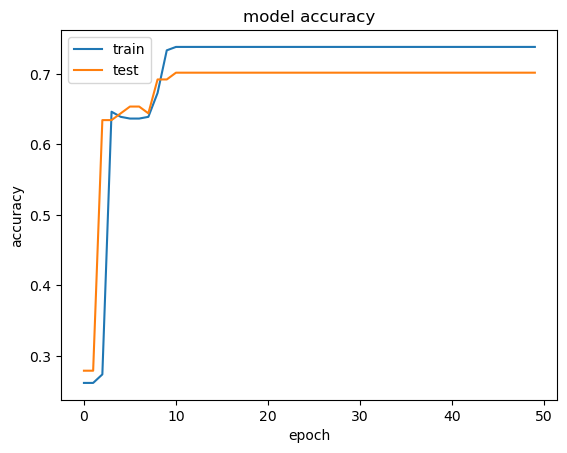

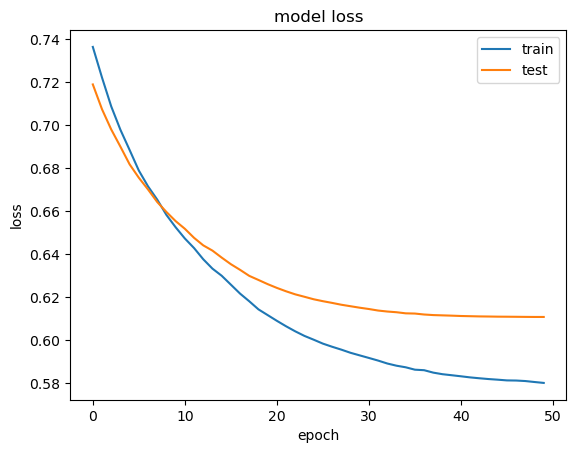

In [374]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()